In [1]:
class Graph:
    def __init__(self):
        self.adj_dict = {}
        
    def add_edge(self, v, u) :
        if v not in self.adj_dict:
            self.adj_dict[v] = {u:1}
        else:
            self.adj_dict[v][u] = 1
            
        if u not in self.adj_dict:
            self.adj_dict[u] = {v:1}
        else:
            self.adj_dict[u][v] = 1
        
    def adj(self, v):
        return self.adj_dict[v]
    
    def vertex(self, v):
        self.adj_list = self.adj_dict[v]
        self.deg = sum(list(map(int, self.adj_list.values())))
        self.vertex_num = 1
        
        return self.vertex_num, self.adj_list, self.deg

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import time
# import sys


edges_path = './Gen_Evolution_set/soc-YouTube-ASU/soc-YouTube-ASU0.edges' #sys.argv[1]
# edges_path = './dataset/soc-YouTube-ASU/soc-YouTube-ASU.edges' #sys.argv[1]
label_path = './dataset/soc-YouTube-ASU/soc-YouTube-ASU.node_labels' #sys.argv[2]
# k = 7 #sys.argv[3]
label_dict = {}
graph_sort = []
label_kind = []
node_dict = {}
superNode = {}
label_f = open(label_path, 'r')
while True:
    line = label_f.readline().replace('\n', '').strip()
    if not line:
        label_kind.append('0')
        break
    node = line.split(',')[0]
    label = line.split(',')[1]
    label_dict[node] = label
    label_kind.append(label)
label_f.close

label_kind = list(set(label_kind))

edge_f = open(edges_path, 'r')
gs = Graph()
while True:
    line = edge_f.readline().replace('\n', '').strip()
    if not line:
        break
    
    v = line.split(',')[0]
    u = line.split(',')[1]
    
    if v not in node_dict:
        node_dict[v] = v
    if u not in node_dict:
        node_dict[u] = u
    
    if v not in label_dict:
        label_dict[v] = '0'
        
    if u not in label_dict:
        label_dict[u] = '0'
    graph_sort.append([v,u])
    gs.add_edge(v,u)
edge_f.close

<function TextIOWrapper.close()>

In [3]:
G = nx.Graph()
for v in node_dict:
    G.add_node(v, label = label_dict[v])
    
for v, u in graph_sort:
    G.add_edge(v,u)

In [ ]:
G.degree()

MemoryError: Unable to allocate 545. GiB for an array with shape (270487, 270487) and data type float64

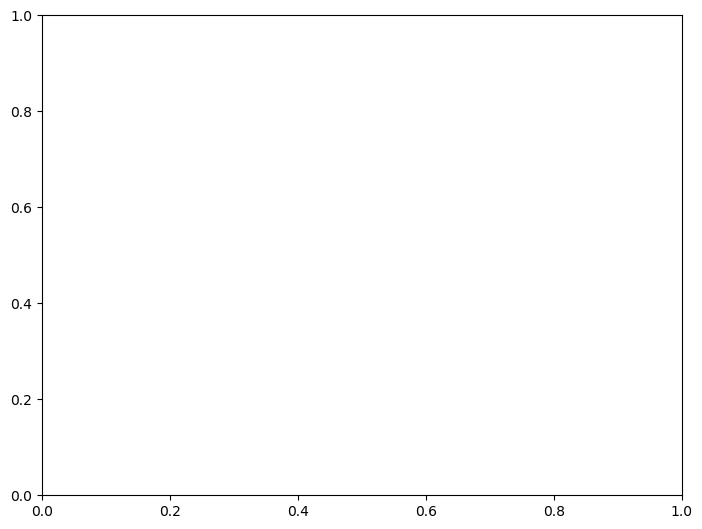

In [5]:
nx.draw(G)
plt.show()

In [10]:
def Super_node_generator(v):
    num_v, adj_v, deg_v = gs.vertex(v)
    label_v = {}
    
    for l in label_kind:
        label_v[l] = 0

    if v in label_dict:
        for ld_v in label_dict[v]:
            label_v[ld_v] = label_v[ld_v] + 1
            
    Vi = [num_v, deg_v, adj_v, label_v]
    
    return Vi

def Super_node_similarity(v, Vi, u, Vj):

    ew_v = Vi[2][u]/Vi[1]
    ew_u = Vj[2][v]/Vj[1]
    n_max = max(Vi[0], Vj[0])
    d_max = max(Vi[1], Vj[1])

    lm_v = sum(list(map(int, Vi[3].values())))
    lm_u = sum(list(map(int, Vj[3].values())))
    dis_att = 0
    
    dis_st = (abs(Vi[0]-Vj[0])/n_max) + (abs(Vi[1]-Vj[1])/d_max) + abs((Vi[2][u]/Vi[1]) - (Vj[2][v]/Vj[1]))

    for vl in Vi[3]:
        dis_att += abs(Vi[3][vl]/lm_v - Vj[3][vl]/lm_u)/2

    dis = (dis_st + dis_att)/2
    sim = 1 - dis
    return sim

def Super_node_similarity2(v, Vi, u, Vj, n):
    
    ew_v = Vi[2][u]/Vi[1]
    
    if v not in Vj[2]:
        save_val = Vj[2][n]
        del Vj[2][n]
        Vj[2][v] = save_val
    
    ew_u = Vj[2][v]/Vj[1]
    n_max = max(Vi[0], Vj[0])
    d_max = max(Vi[1], Vj[1])

    lm_v = sum(list(map(int, Vi[3].values())))
    lm_u = sum(list(map(int, Vj[3].values())))
    dis_att = 0
    
    dis_st = (abs(Vi[0]-Vj[0])/n_max) + (abs(Vi[1]-Vj[1])/d_max) + abs((Vi[2][u]/Vi[1]) - (Vj[2][v]/Vj[1]))

    for vl in Vi[3]:
        dis_att += abs(Vi[3][vl]/lm_v - Vj[3][vl]/lm_u)/2

    dis = (dis_st + dis_att)/2
    sim = 1 - dis
    return sim

def Merged_super_node(v, u, Vi, Vj):
    num_v = Vi[0]+Vj[0]
    adj_v = {}
    label_v = {}
    for adj in Vi[2]:
        if adj == u:
            continue
        if adj in Vj[2]:
            adj_v[adj] = Vi[2][adj] + Vj[2][adj]
        else:
            adj_v[adj] = Vi[2][adj]
            
    for adj in Vj[2]:
        if adj == v:
            continue
        if adj not in Vi[2]:
            adj_v[adj] = Vj[2][adj]
    if v in adj_v:
        del adj_v[v]
        
    if u in adj_v:
        del adj_v[u]
    deg_v = sum(list(map(int, adj_v.values())))
    
    for lab in Vi[3]:
        if lab in Vj[3]:
            label_v[lab] = Vi[3][lab] + Vj[3][lab]
            
    nVi = [num_v, deg_v, adj_v, label_v]
    
    return nVi

In [11]:
for node in node_dict:
    superNode[node] = Super_node_generator(node)
    
sim_list = []

for v, u in graph_sort:
    sim_list.append([v, u, Super_node_similarity(v, superNode[v], u, superNode[u])]) #triple entry
   
sim_list.sort(reverse=True, key=lambda x:x[2])

In [12]:
print(len(sim_list))
while(True): #k
    v = sim_list[0][0]
    u = sim_list[0][1]
    s1 = time.time()
    if v in superNode and u in superNode:
        del_list = []
        superNode[v] = Merged_super_node(v, u, superNode[v], superNode[u])
        del(superNode[u])
        del(sim_list[0])
        e1 = time.time()
        nei_e = list(superNode[v][2].keys())
        
        for sim_one in sim_list:
            if sim_one[0] == v or sim_one[0] == u or sim_one[1] == v or sim_one[1] == u:
                del_list.append(sim_one)
                
        for del_one in del_list:
            sim_list.remove(del_one)

        for n in nei_e:
            if n not in superNode:
                del superNode[v][2][n]
                continue
            else:
                sim_list.append([v, n, Super_node_similarity2(v, superNode[v], n, superNode[n], u)])

    else:
        del(sim_list[0])
        
    sim_list.sort(reverse=True, key=lambda x:x[2])
    deg_size = len(nei_e)
    sim_size = len(sim_list)
    
    d1 = e1-s1
    print(f'v: {v}, u: {u}, Size: {sim_size}, Time: {d1}, deg: {deg_size}')
    
    if sim_size <= 32:
        break


299044
v: 485781, u: 600449, Size: 299043, Time: 0.0005087852478027344, deg: 0
v: 921766, u: 978717, Size: 299042, Time: 0.0009958744049072266, deg: 0
v: 409818, u: 579787, Size: 299041, Time: 0.0, deg: 0
v: 101967, u: 160859, Size: 299040, Time: 0.0009968280792236328, deg: 4
v: 283741, u: 1125758, Size: 299039, Time: 0.000997304916381836, deg: 0
v: 636086, u: 636094, Size: 299038, Time: 0.0010020732879638672, deg: 0
v: 401126, u: 404825, Size: 299037, Time: 0.0009965896606445312, deg: 0
v: 156832, u: 393299, Size: 299036, Time: 0.0, deg: 2
v: 267367, u: 527687, Size: 299035, Time: 0.0004966259002685547, deg: 0
v: 1008769, u: 1012697, Size: 299034, Time: 0.0, deg: 0
v: 82039, u: 167150, Size: 299033, Time: 0.0, deg: 2
v: 531347, u: 611592, Size: 299032, Time: 0.0, deg: 0
v: 420083, u: 582029, Size: 299031, Time: 0.0, deg: 0
v: 355024, u: 563893, Size: 299030, Time: 0.0009970664978027344, deg: 0
v: 650338, u: 892287, Size: 299029, Time: 0.0009965896606445312, deg: 0
v: 266528, u: 278602

In [20]:
print(superNode['20304'])
# print(len(superNode['6482'][2]))
print(sim_list[0])

[2, 304, {'311': 1, '617': 1, '1013': 1, '1064': 1, '1072': 1, '1125': 1, '1809': 1, '1848': 1, '1854': 1, '1911': 1, '2198': 1, '5134': 1, '5235': 1, '6320': 1, '6430': 1, '6441': 1, '6472': 1, '6478': 1, '6656': 1, '11010': 1, '11810': 1, '11868': 1, '13601': 1, '14703': 1, '15144': 1, '17343': 1, '18026': 1, '18173': 1, '18245': 1, '18473': 1, '18764': 1, '20082': 1, '20138': 1, '20153': 1, '20195': 1, '20261': 1, '20325': 1, '20352': 1, '20360': 1, '20374': 1, '20396': 1, '20415': 1, '20487': 1, '20488': 1, '20489': 2, '20509': 1, '20567': 1, '20728': 1, '20755': 1, '20762': 1, '20790': 1, '20833': 1, '21021': 1, '21042': 1, '21098': 1, '21250': 1, '21285': 1, '21726': 1, '22147': 1, '22384': 1, '22929': 1, '24396': 1, '25435': 1, '27448': 1, '29977': 1, '30025': 1, '30140': 1, '30146': 1, '30881': 1, '31084': 1, '31428': 1, '33588': 1, '33894': 1, '37244': 1, '38315': 1, '48369': 1, '53262': 1, '54793': 1, '60432': 2, '62313': 1, '62545': 1, '63401': 1, '63521': 1, '63545': 2, '63

In [19]:
Gs = sim_list
f = open('result_youtube.txt', 'w')

for e in Gs:
    str_e = e[0] + ',' + e[1] + '\n'
    f.write(str_e)
        
f.close()

In [29]:
sim_list1 = []

v, n, u = '20304', '5134', ''
s1 = time.time()
for i in range(150000):
    sim_list1.append([v, n, Super_node_similarity2(v, superNode[v], n, superNode[n], u)])
    
s1 = time.time() - s1

print(s1)

1.676496982574463
